In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
import skimage.filters as filters
import skimage.exposure as exposure
from skimage.feature import greycomatrix, greycoprops

In [28]:
def preprocessing(img):
    img = cv2.resize(img, (500, 500))
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    green = img[:, :, 1]
    incomplement = cv2.bitwise_not(green) #atau bisa pake abs(255-green)
    # incomplement = abs(255-green)
    clache = cv2.createCLAHE(clipLimit=5)
    cl1 = clache.apply(incomplement)
    #morphologycal structure element
    # se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8))
    #morphologycal opening radius 8
    mopopen = morph.opening(cl1, morph.disk(8, dtype=np.uint8))
    #remove optic disk
    godisk = cl1 - mopopen
    #2d median filter
    # medfilt = cv2.medianBlur(godisk, 5)
    medfilt = filters.median(godisk)
    #background imopen
    background = morph.opening(medfilt, morph.disk(15, dtype=np.uint8))
    #remove background
    rmBack = medfilt - background
    #image adjustment contrast
    v_min, v_max = np.percentile(rmBack, (0.2, 99.8))
    better_contrast = exposure.rescale_intensity(rmBack, in_range=(v_min, v_max))
    #otsu thresholding
    ret, thresh = cv2.threshold(better_contrast, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #remove small objects
    rmSmall = morph.remove_small_objects(thresh, min_size=50, connectivity=1, in_place=False)

    return img

In [122]:
def preprocessing(img):
    img = cv2.resize(img, (500, 500))
    # grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # clahe
    clache = cv2.createCLAHE(clipLimit=5)
    cl1 = clache.apply(gray)
    #canny edge detection
    edges = cv2.Canny(cl1, 75, 150)
    # fill holes
    closing = morph.closing(edges, morph.disk(1, dtype=np.uint8))
    # microaneurysm detection
    # microaneurysm = closing - edges

    return closing

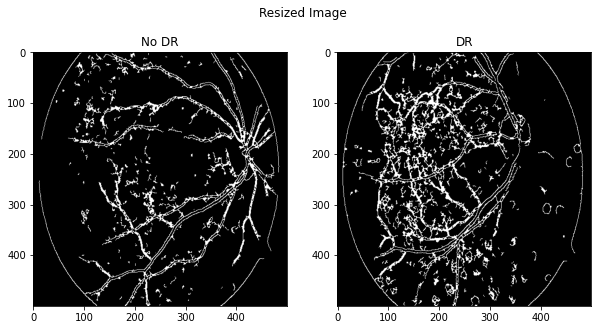

In [123]:
img0 = cv2.imread('C:/Users/user/Documents/Python/DiabeticRetinopathy/dataset/0/image111.png')
img1 = cv2.imread('C:/Users/user/Documents/Python/DiabeticRetinopathy/dataset/1/image001.png')

img0 = preprocessing(img0)
img1 = preprocessing(img1)

plt.figure(figsize=(10, 5))
plt.suptitle('Resized Image')
plt.subplot(121)
plt.title('No DR')
plt.imshow(img0, cmap='gray', vmin=0, vmax=255)
# cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.subplot(122)
plt.title('DR')
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)

In [75]:
img0 = cv2.imread('C:/Users/user/Documents/Python/DiabeticRetinopathy/dataset/0/image111.png')
img1 = cv2.imread('C:/Users/user/Documents/Python/DiabeticRetinopathy/dataset/1/image001.png')

img0 = preprocessing(img0)
img1 = preprocessing(img1)

cv2.imshow('img0', img0)
cv2.imshow('img1', img1)

cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.5.4-dev) :-1: error: (-5:Bad argument) in function 'apply'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [120]:
def glcm(img):
    glcm_feature = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    distance = [5]
    angles = [0]
    level = 256
    symetric = True
    normed = True

    glcm = greycomatrix(img, distance, angles, level, symmetric=symetric, normed=normed)
    glcm_props = [property for name in glcm_feature for property in greycoprops(glcm, name)[0]]

    return glcm_props

In [124]:
glcm0 = glcm(img0)
glcm1 = glcm(img1)

print(glcm0)
print(glcm1)

[7077.347272727273, 27.75430303030303, 0.8911612697578312, 0.7445143785654526, 0.8628524662799849, 0.3132727135067389]
[9724.061818181817, 38.133575757575755, 0.850458865404887, 0.6668759898296093, 0.8166247546025097, 0.2738629482666186]
